In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
import os
import sys
import numpy as np
from collections import OrderedDict as OD
#import uproot3
import uproot
import hist
import matplotlib.pyplot as plt
import mplhep as hep
import json

#sAnaVersion = 'QCD_fullHT'



#from HistogramListForPlotting_StitchHTBins import *
#from HistogramListForPlotting_tmp import *
#from HistogramListForPlotting_QCDStitch_1 import *
#from HistogramListForPlotting_tmp2 import * 
#from HistogramListForPlotting_QCDStitch_2 import *
#from HistogramListForPlotting_QCDStitch_PhSpOverlapRewgt import *
#from HistogramListForPlotting_QCDStitch_PhSpOverlapRewgt import *
#from HistogramsListForPlotting_CheckNewSignal import *
from HistogramsListForPlotting_SystematicsVariations import *



    
fIpFiles = OD()
for sIpFileName, sIpFileNameFull in sIpFiles.items():
    print(f"{sIpFileName = }, {sIpFileNameFull = }, ")
    fIpFiles[sIpFileName] = uproot.open(sIpFileNameFull)
    

sIpFileName = 'SystVariations', sIpFileNameFull = '/eos/cms/store/user/ssawant/htoaa/analysis/20240809_gg0l_FullSyst/2018/analyze_htoaa_SUSY_GluGluH_01J_HToAATo4B_Pt150_M-30_TuneCP5_13TeV_madgraph_pythia8_0_0.root', 


In [7]:
#print(f"{json.dumps(histograms_dict, indent=4) = }")
print(json.dumps(histograms_dict, indent=4))

{
    "gg0lIncl_hLeadingFatJetMSoftDrop_PU": {
        "xAxisLabel": "msoft [GeV]",
        "yAxisLabel": "A. U.",
        "xAxisRange": [
            50,
            170
        ],
        "histosToOverlay": {
            "Nom": [
                {
                    "ipFileNameNice": "SystVariations",
                    "histogramName": "evt/ggHtoaato4b_mA_30/hLeadingFatJetMSoftDrop_gg0lIncl_SRWP40_Nom"
                }
            ],
            "PUUp": [
                {
                    "ipFileNameNice": "SystVariations",
                    "histogramName": "evt/ggHtoaato4b_mA_30/hLeadingFatJetMSoftDrop_gg0lIncl_SRWP40_PUUp"
                }
            ],
            "PUDown": [
                {
                    "ipFileNameNice": "SystVariations",
                    "histogramName": "evt/ggHtoaato4b_mA_30/hLeadingFatJetMSoftDrop_gg0lIncl_SRWP40_PUDown"
                }
            ]
        }
    },
    "gg0lIncl_hLeadingFatJetPt_PU": {
        "xAxisLabel": "FatJe



plotNameNice: gg0lIncl_hLeadingFatJetMSoftDrop_PU
sIpFileName_: SystVariations,  sHistogramName_: evt/ggHtoaato4b_mA_30/hLeadingFatJetMSoftDrop_gg0lIncl_SRWP40_Nom, nRebins = 1
idxXAxisRangeMin = array([[49],
       [50]]), idxXAxisRangeMax = array([[169],
       [170]])
xAxisRange = [50, 170], xAxisBinCenters_ = array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
        54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
        63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
        72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
        81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.

ValueError: 'yerr' (shape: (2, 200)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (300,))

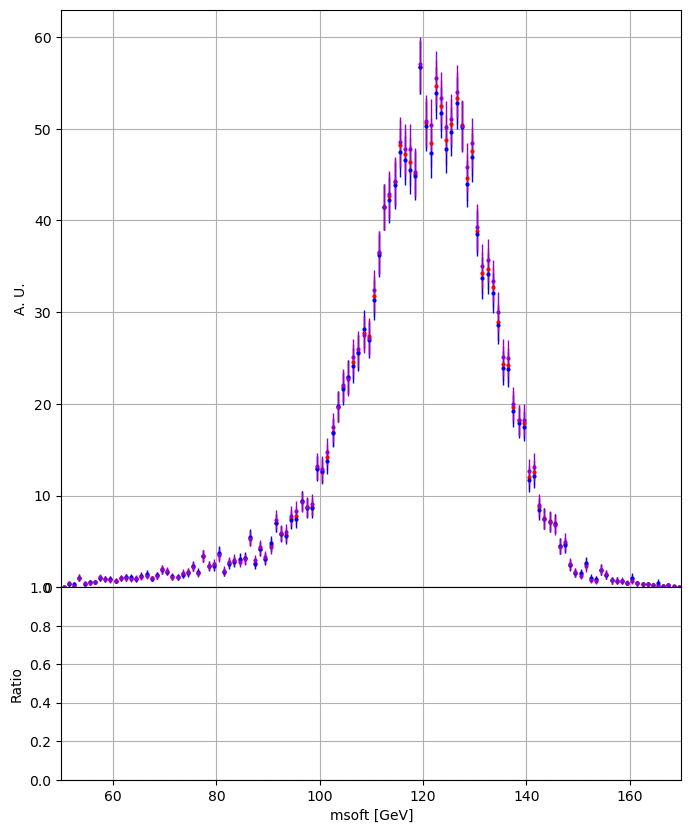

In [8]:

era = 2018
luminosity = 59.83
cmsWorkStatus='Work in Progress'
sData = "" # "Data", "" 


#systematics_list = ['central']
marker_color_list = ['r', 'b', 'darkviolet', 'c', 'orange', 'green', 'magenta', 'saddlebrown', 'grey', 'yellow']
marker_style_list = ["o", "o", "o", '>', '^', 'v', 'x', 'x', 'x', "s", "+", '*',"X"]
marker_size_list  = [2, 2, 2, 2, 2, 2, 2, 2, 2]
#marker_size_list  = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
                
normalize_histogram = False
normalize_histogram_manually = False # True
makeRatioPlot = True # True False

yAxisScaleToUse = ['linearY'] #['linearY', 'logY']

printLevel = 5
skip_plotNameNice = [
]

rationPlotYRange = [0.5, 1.5]
showRatioPlotYError = False # True

for plotNameNice in histograms_dict.keys():
    if plotNameNice in skip_plotNameNice: continue
    
    if printLevel >= 0:
        print(f"\n\nplotNameNice: {plotNameNice}")
    
    xAxisLabel = histograms_dict[plotNameNice][sXLabel] if sXLabel in list(histograms_dict[plotNameNice].keys()) else None
    yAxisLabel = histograms_dict[plotNameNice][sYLabel] if sYLabel in list(histograms_dict[plotNameNice].keys()) else None
    xAxisRange = histograms_dict[plotNameNice][sXRange] if sXRange in list(histograms_dict[plotNameNice].keys()) else None
    yAxisRange = histograms_dict[plotNameNice][sYRange] if sYRange in list(histograms_dict[plotNameNice].keys()) else None 
    xAxisScale = histograms_dict[plotNameNice][sXScale] if sXScale in list(histograms_dict[plotNameNice].keys()) else ""
        
    nRebins = histograms_dict[plotNameNice][sNRebin] if sNRebin in list(histograms_dict[plotNameNice].keys()) else 1
    
    #print(f"xAxisLabel: {xAxisLabel}, yAxisLabel: {yAxisLabel}, xAxisRange: {xAxisRange}, yAxisRange: {yAxisRange}, nRebins: {nRebins} ")
    
    histosToOverlay = OD()
    yAxisRange_auto = [1e20, -1e20]
    #for iHistoToOverlay_name in range(len(histograms_dict[plotNameNice][sHistosToOverlay])):
    for iHistoToOverlay_name in histograms_dict[plotNameNice][sHistosToOverlay].keys():
        #print(f"iHistoToOverlay_name: {iHistoToOverlay_name}")
        
        histosToOverlay[iHistoToOverlay_name] = None
        h_added = None
        h = []
        for iHistoToHadd in range(len(histograms_dict[plotNameNice][sHistosToOverlay][iHistoToOverlay_name])):
        
            sIpFileName_    = histograms_dict[plotNameNice][sHistosToOverlay][iHistoToOverlay_name][iHistoToHadd][sIpFileNameNice]
            fIp_            = fIpFiles[sIpFileName_]
            sHistogramName_ = histograms_dict[plotNameNice][sHistosToOverlay][iHistoToOverlay_name][iHistoToHadd][sHistName]
            h_ = fIp_[sHistogramName_]
            h1_ = h_.to_hist()
            
            h1Rebin_ = None
            if   nRebins == 1:
                h1Rebin_ = h1_
            elif   nRebins == 2:
                h1Rebin_ = h1_[::2j]
            elif nRebins == 3:
                h1Rebin_ = h1_[::3j]
            elif nRebins == 4:
                h1Rebin_ = h1_[::4j]
            elif nRebins == 5:
                h1Rebin_ = h1_[::5j]
            elif nRebins == 6:
                h1Rebin_ = h1_[::6j]
            elif nRebins == 10:
                h1Rebin_ = h1_[::10j]
            elif nRebins == 20:
                h1Rebin_ = h1_[::20j]
            elif nRebins == 40:
                h1Rebin_ = h1_[::40j]
            elif nRebins == 50:
                h1Rebin_ = h1_[::50j]
            elif nRebins == 100:
                h1Rebin_ = h1_[::100j]
                print("Rebin 100 <<<")
            else:
                print(f"nRebins={nRebins} is not yet implemented... Implement it \t\t **** ERROR ****")
                break
                
            if   nRebins > 1:    
                h1_ = h1Rebin_
            
            if printLevel >= 0:
                print(f"sIpFileName_: {sIpFileName_},  sHistogramName_: {sHistogramName_}, {nRebins = }")    
            '''
            print(f"h_ ({type(h_)}): {h_}")
            #print(f"h1_ ({type(h1_)}): {h1_}")
            print(f"h1_ ({type(h1_)})")
            print(f"h1_.values() ({type(h1_.values())}) ({len(h1_.values())}) {h1_.values()}")
            print(f"\nh1_.variances() ({type(h1_.variances())}) ({len(h1_.variances())}) {h1_.variances()}")
            
            print(f"h1_.view() ({type(h1_.view())}) ({len(h1_.view())}): {h1_.view()}")
            '''
            
            if printLevel >= 10:
                #print(f"h1_ ({type(h1_)}): {h1_}")
                print(f"h1_.values() ({type(h1_.values())}) ({len(h1_.values())}) {h1_.values()}")
                print(f"\nh1_.variances() ({type(h1_.variances())}) ({len(h1_.variances())}) {h1_.variances()}")
            
            
            h.append( h1_ )
            
            #if h_added == None:
            if histosToOverlay[iHistoToOverlay_name] == None:
                #h_added = h1_
                histosToOverlay[iHistoToOverlay_name] = h1_
            else:
                #h_added = h_added + h1_
                histosToOverlay[iHistoToOverlay_name] = histosToOverlay[iHistoToOverlay_name] + h1_
                
            #print(f"\n\nh_added.view() ({type(h_added.view())}) ({len(h_added.view())}): {h_added.view()}")
            
        if printLevel >= 8:
            print(f"histosToOverlay[{iHistoToOverlay_name}].values() ({type(histosToOverlay[iHistoToOverlay_name].values())}) ({len(histosToOverlay[iHistoToOverlay_name].values())}): {histosToOverlay[iHistoToOverlay_name].values()}")
            print(f"histosToOverlay[{iHistoToOverlay_name}].variances() ({type(histosToOverlay[iHistoToOverlay_name].variances())}) ({len(histosToOverlay[iHistoToOverlay_name].variances())}): {histosToOverlay[iHistoToOverlay_name].variances()}")
            
        if normalize_histogram_manually:
            nEnries = np.sum( histosToOverlay[iHistoToOverlay_name].values() )
            scale_ = 1 / nEnries
            histosToOverlay[iHistoToOverlay_name] = histosToOverlay[iHistoToOverlay_name] * scale_
            if printLevel >= 10:
                print(f"{nEnries = },  {scale_ = }")            
            
        idxXAxisRangeMin = 0
        idxXAxisRangeMax = -1
        if xAxisRange:
            # find yMin_ and yMax_ within xAxisRange
            xAxisBinCenters_ = histosToOverlay[iHistoToOverlay_name].axes[0].centers
            binWidth_        = abs(xAxisBinCenters_[0] - xAxisBinCenters_[1])/2
            idxXAxisRangeMin = np.argwhere(np.isclose(xAxisBinCenters_, xAxisRange[0], atol=binWidth_) ) # Returns: [[979]   [980]]
            idxXAxisRangeMax = np.argwhere(np.isclose(xAxisBinCenters_, xAxisRange[1], atol=binWidth_) ) # Returns: [[1019]  [1020]]
            print(f"{idxXAxisRangeMin = }, {idxXAxisRangeMax = }")
            print(f"{xAxisRange = }, {xAxisBinCenters_ = }")
            idxXAxisRangeMin = idxXAxisRangeMin[0][0]
            idxXAxisRangeMax = idxXAxisRangeMax[-1][-1]
            
        yLow_ = histosToOverlay[iHistoToOverlay_name].values()[idxXAxisRangeMin:idxXAxisRangeMax+1] - np.sqrt(histosToOverlay[iHistoToOverlay_name].variances()[idxXAxisRangeMin:idxXAxisRangeMax+1])
        
        if yLow_[np.nonzero(yLow_)].shape[0] == 0: continue
                      
        yMin_ = np.amin( yLow_[np.nonzero(yLow_)] ) 
        yMax_ = np.amax( histosToOverlay[iHistoToOverlay_name].values()[idxXAxisRangeMin:idxXAxisRangeMax+1] + np.sqrt(histosToOverlay[iHistoToOverlay_name].variances()[idxXAxisRangeMin:idxXAxisRangeMax+1]) )
            
        yAxisRange_auto[0] = yMin_ if yMin_ < yAxisRange_auto[0] else yAxisRange_auto[0]
        yAxisRange_auto[1] = yMax_ if yMax_ > yAxisRange_auto[1] else yAxisRange_auto[1]
        
        if printLevel >= 5:
            print(f"{iHistoToOverlay_name = }: yAxisRange_auto: {yAxisRange_auto}, yMin_: {yMin_}, yMax_: {yMax_}, ")
        #print(f"histosToOverlay[iHistoToOverlay_name].values() - np.sqrt(histosToOverlay[iHistoToOverlay_name].variances() ({type(histosToOverlay[iHistoToOverlay_name].values() - np.sqrt(histosToOverlay[iHistoToOverlay_name].variances()))}): {histosToOverlay[iHistoToOverlay_name].values() - np.sqrt(histosToOverlay[iHistoToOverlay_name].variances())}")
        
        
        
      
    #hStack_list = [ hBkg_list[idx] for idx in idx_hBkg_sortedByIntegral ]  
    #sStack_list = [ sBkg_list[idx] for idx in idx_hBkg_sortedByIntegral ]  
    #print(f"histosToOverlay.values() ({type(histosToOverlay.values())}): histosToOverlay.values()")
    #print(f"list(histosToOverlay.values()) ({type(list(histosToOverlay.values()))}): list(histosToOverlay.values())")
    #print(f"histosToOverlay[0].values() ({type(histosToOverlay[0].values())}): {histosToOverlay[0].values()}")
    
    histosToOverlay_values_list    = np.array( [ histosToOverlay[iHistoToOverlay].values() for iHistoToOverlay in histosToOverlay.keys() ] )
    histosToOverlay_error_list     = np.array( [ np.sqrt(histosToOverlay[iHistoToOverlay].variances()) for iHistoToOverlay in histosToOverlay.keys() ] )
    histosToOverlay_binEdges       = histosToOverlay[list(histosToOverlay.keys())[0]].axes[0].edges
    histosToOverlay_name_list      = list(histosToOverlay.keys())
    #print(f"histosToOverlay_binEdges ({type(histosToOverlay_binEdges)}) ({len(histosToOverlay_binEdges)}): {histosToOverlay_binEdges}")
    
    if printLevel >= 3:
        print(f"yAxisRange: {yAxisRange},  yAxisRange_auto: {yAxisRange_auto}")

    for yAxisScale in yAxisScaleToUse: #['linearY', 'logY']: # ['linearY']
        
        #fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,10), sharex='col', gridspec_kw={'height_ratios': [3, 1]}, subplot_kw={'ymargin': 0.4})
        fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,10), sharex='col', gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})

        for iHistoToOverlay in range(len(histosToOverlay_name_list)):
            hep.histplot(
                histosToOverlay_values_list[iHistoToOverlay], bins=histosToOverlay_binEdges, yerr=histosToOverlay_error_list[iHistoToOverlay], 
                label=histosToOverlay_name_list[iHistoToOverlay], 
                ax=ax[0], 
                histtype='errorbar', 
                density=normalize_histogram,
                color=marker_color_list[iHistoToOverlay], #'r',
                markersize=marker_size_list[iHistoToOverlay], #3,
                marker=marker_style_list[iHistoToOverlay] #marker_style_list
            )            
            
        
        if yAxisRange:
            yAxisRange_toUse = yAxisRange
        else:
            yAxisRange_toUse = yAxisRange_auto
            if yAxisScale == 'logY':
                yAxisRange_toUse[1] = yAxisRange_toUse[1] * 1e2
            else:
                yAxisRange_toUse[1] = yAxisRange_toUse[1] * 1.2
                
        if not normalize_histogram:
            #print(f"yAxisRange_toUse: {yAxisRange_toUse},  yAxisRange: {yAxisRange}, yAxisRange_auto: {yAxisRange_auto}")
            #ax[0].set_ylim(yAxisRange_toUse[0], yAxisRange_toUse[1])
            pass
        if xAxisRange: ax[0].set_xlim(xAxisRange[0], xAxisRange[1])
        if xAxisLabel: ax[0].set_xlabel(xAxisLabel)
        if xAxisLabel: ax[1].set_xlabel(xAxisLabel)
        if yAxisLabel: ax[0].set_ylabel(yAxisLabel)
        ax[1].set_ylabel("Ratio")
        ax[0].grid(True)
        ax[1].grid(True)
        
        
        # Ratio plot ---------------------------------------------------------------------
        if makeRatioPlot and len(histosToOverlay_name_list) > 1:
            yAxisRange_RatioPlot_auto = [1e10, -1e10]
            for iHistoToOverlay in range(0, len(histosToOverlay_name_list)):
            #for iHistoToOverlay in range(1, 2):
                N_values = histosToOverlay_values_list[iHistoToOverlay]
                D_values = histosToOverlay_values_list[0]
                N_errors = histosToOverlay_error_list[iHistoToOverlay]
                D_errors = histosToOverlay_error_list[0]

                ratio_values = np.divide(N_values, D_values, where=D_values!=0, out=np.ones(len(D_values)))                    
                if showRatioPlotYError:
                    ratio_error  = N_errors            
                    ratio_error  = np.divide(ratio_error, D_values, where=D_values!=0, out=np.zeros(len(D_values)))
                else:
                    ratio_error = np.zeros(len(D_values))

                

                #print(f"ratio_values ({type(ratio_values)}) ({len(ratio_values)}): {ratio_values}")
                #print(f"ratio_error ({type(ratio_error)}) ({len(ratio_error)}): {ratio_error}")
                    
                if iHistoToOverlay != 0:
                    color_=marker_color_list[iHistoToOverlay]
                    markersize_=marker_size_list[iHistoToOverlay]
                    marker_=marker_style_list[iHistoToOverlay]                    
                    hep.histplot(
                        ratio_values, bins=histosToOverlay_binEdges, yerr=ratio_error, 
                        #label=histosToOverlay_name_list[iHistoToOverlay], 
                        ax=ax[1], 
                        histtype='errorbar', 
                        #density=normalize_histogram,
                        color=color_, #'r',
                        markersize=markersize_, #3,
                        marker=marker_ #marker_style_list
                    )
                    
                else:
                    # systematics band in ratio plot
                    color_='silver'
                    markersize_=0.5
                    marker_='.'                    
                    hep.histplot(
                        ratio_values, bins=histosToOverlay_binEdges, yerr=ratio_error, 
                        #label=histosToOverlay_name_list[iHistoToOverlay], 
                        ax=ax[1], 
                        histtype='errorbar', 
                        #density=normalize_histogram,
                        color=color_, #'r',
                        markersize=markersize_, #3,
                        marker=marker_, #marker_style_list
                        alpha=0.5,
                        elinewidth=4
                    )
                
                yLow_ = ratio_values # ratio_values - ratio_error
                yUp_  = ratio_values # ratio_values + ratio_error
                yMin_ = np.amin( yLow_[np.nonzero(yLow_)] )
                yMax_ = np.amax( yUp_ )
            
                yAxisRange_RatioPlot_auto[0] = yMin_ if yMin_ < yAxisRange_RatioPlot_auto[0] else yAxisRange_RatioPlot_auto[0]
                yAxisRange_RatioPlot_auto[1] = yMax_ if yMax_ > yAxisRange_RatioPlot_auto[1] else yAxisRange_RatioPlot_auto[1]

    
            print(f"yAxisRange_RatioPlot_auto: {yAxisRange_RatioPlot_auto }")
            if xAxisRange: ax[1].set_xlim(xAxisRange[0], xAxisRange[1])
            #ax[1].set_ylim(0, 2)
            #ax[1].set_ylim(0.99, 1.01)
            ax[1].set_ylim(yAxisRange_RatioPlot_auto[0] * 0.98, yAxisRange_RatioPlot_auto[1] * 1.02)
            #if yAxisRange_RatioPlot_auto[0] < 0.9 or yAxisRange_RatioPlot_auto[1] > 1.1:
            #    ax[1].set_ylim(0.9, 1.1)
            rationPlotYRange
            if yAxisRange_RatioPlot_auto[0] < rationPlotYRange[0] or yAxisRange_RatioPlot_auto[1] > rationPlotYRange[1]:
                ax[1].set_ylim(rationPlotYRange[0], rationPlotYRange[1])
            #ax[1].set_ylim(yAxisRange_RatioPlot_auto[0], yAxisRange_RatioPlot_auto[1])            
            if xAxisLabel: ax[1].set_xlabel(xAxisLabel)
            #if yAxisLabel: ax[1].set_xlabel(xAxisLabel)
            ax[1].set_ylabel('Ratio')
                
            ax[1].axhline(y=1, linestyle='--')
            
        ax[0].legend(fontsize=15, loc='upper right', bbox_to_anchor=(0.4, 0.75, 0.6, 0.25), ncol=1)
        if yAxisScale == 'logY': ax[0].set_yscale('log', base=10)
        if 'log' in xAxisScale:
            base_ = int( xAxisScale.split('_')[1] )
            ax[0].set_xscale('log', base=base_)
        #ax[0].set_ymargin(1)
        #ax[0].set_xticks(np.arange(200, 2500, 200))

        #hep.cms.label(ax=ax[0], data=True if sData else False, year=era, lumi=luminosity, label=cmsWorkStatus, fontsize=14)
        ax[0].set_title(sAnaVersion)

        
        try:
            fig.savefig('%s/%s_%s.png' % (sOpDir, plotNameNice, yAxisScale), transparent=False, dpi=200, bbox_inches="tight")
        except:
            print("%s/%s_%s.png could not save" % (sOpDir, plotNameNice, yAxisScale))

        
        #plt.close(fig)
        

